In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 211k/211k [00:01<00:00, 120kB/s]

Extracting files...
Path to dataset files: C:\Users\user1\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [5]:
import os
path = r"C:\Users\user1\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1"
print(os.listdir(path))

['spam.csv']


In [17]:
import pandas as pd
import os

file_path = os.path.join(path, "spam.csv")

# Read CSV safely,for ignoring encoding issues
df = pd.read_csv(file_path, encoding='latin1')

# Keep only the first two columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# check the first few rows
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [21]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [27]:
df.shape

(5572, 2)

In [29]:
df.size

11144

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [33]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
df.columns = ["label", "message"]

In [37]:
df.isnull().values.any()

np.False_

In [39]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True) #drop duplicates

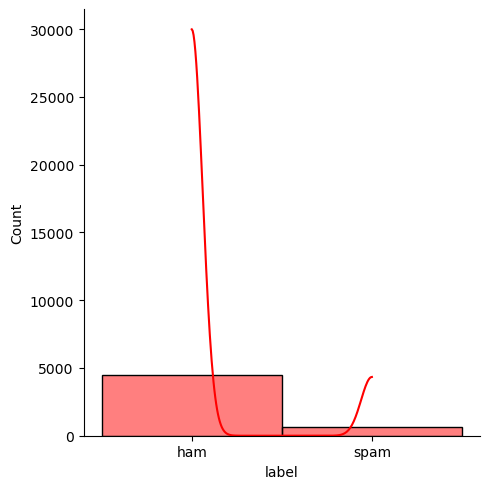

In [43]:
# Data Visualization
sns.displot(df.label, kde =True, color = "red")

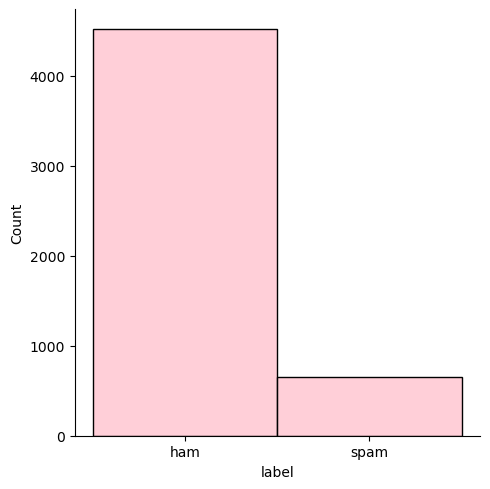

In [45]:
sns.displot(df.label, color = "pink")

In [47]:
#LabelEncoder to encode categorical variable(label) to numeric.
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"].values)

In [49]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 8672))

In [53]:
y = df["label"]

In [55]:
X.shape

(5169, 8672)

In [57]:
y.shape

(5169,)

In [59]:
df.count()

label      5169
message    5169
dtype: int64

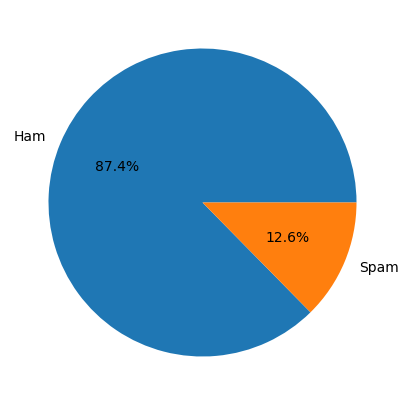

In [61]:
#Spam label Visualization on the basis of records in pie-chart
p, k = len(df[df["label"] == 0]), len(df[df["label"] == 1])
label = np.array(["Ham", "Spam"])
values = np.array([p, k])
plt.figure(figsize=(5, 5))
plt.pie(values, labels=label, autopct="%.1f%%")
plt.show()

In [63]:
#Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
#Train Naive Bayes Classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [67]:
nb_predictions = naive_bayes_model.predict(X_test)

In [69]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))
print("Precision_score: ", precision_score(y_test, nb_predictions))
print("Recall_score: ", recall_score(y_test, nb_predictions))
print("f1_score: ", f1_score(y_test, nb_predictions))

Naive Bayes Model:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  1.0
Recall_score:  0.6827586206896552
f1_score:  0.8114754098360656


In [71]:
#Train Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [73]:
lr_predictions = logistic_regression_model.predict(X_test) # Making predictions

In [75]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  0.9714285714285714
Recall_score:  0.7034482758620689
f1_score:  0.816


In [77]:
#Train Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
svm_predictions = svm_model.predict(X_test) # Making Predictions
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_predictions))
print("r2_Score: ", r2_score(y_test, svm_predictions))
print("Precision_score: ", precision_score(y_test, svm_predictions))
print("Recall_score: ", recall_score(y_test, svm_predictions))
print("f1_score: ", f1_score(y_test, svm_predictions))

Support Vector Machine (SVM) Model:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9835589941972921
r2_Score:  0.8636360110158644
Precision_score:  0.9776119402985075
Recall_score:  0.903448275862069
f1_score:  0.9390681003584229
